In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
df = pd.read_csv("../../data/multi_features.csv")
#dfval=pd.read_csv("~/Desktop/LR_grabor/image_features2.csv")
#df_combined = pd.concat([df, dfval], ignore_index=True)
#df_combined.to_csv("fichier_combined.csv", index=False)

In [10]:
df.head()

,Numéro d'image,Gabor,DCT,Fourier,PHOG,Étiquette
0,1565,0.136294,1.250935,0.020754,0.131356,1
1,2902,0.141953,1.820498,0.019932,0.132183,1
2,2013,0.129704,1.135493,0.026567,0.092114,1
3,1164,0.125387,0.914267,0.028794,0.090840,0
4,967,0.125992,1.182731,0.030288,0.100134,0


In [23]:
X = df[['Gabor', 'DCT', 'Fourier', 'PHOG']]
y = df['Étiquette']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

lr = LogisticRegression()

lr.fit(X_train, y_train)

train_predictions = lr.predict(X_train)
train_probabilities = lr.predict_proba(X_train)[:,1]

df_train_results = pd.DataFrame(y_train)
df_train_results['predicted'] = train_predictions
df_train_results['probability'] = train_probabilities

print(df_train_results.head())


train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Accuracy on training data: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, train_predictions))
print('Classification Report:')
print(classification_report(y_train, train_predictions))


test_predictions = lr.predict(X_test)
test_probabilities = lr.predict_proba(X_test)[:,1]


df_test_results = pd.DataFrame(y_test)
df_test_results['predicted'] = test_predictions
df_test_results['probability'] = test_probabilities


print(df_test_results.head())


test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy on test data: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, test_predictions))
print('Classification Report:')
print(classification_report(y_test, test_predictions))

      Étiquette  predicted  probability
1051          1          1     0.801000
3209          0          1     0.675313
3599          1          1     0.896279
4758          1          1     0.740170
4500          1          0     0.424430
Accuracy on training data: 0.73
Confusion Matrix:
[[ 229  715]
 [ 265 2442]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.24      0.32       944
           1       0.77      0.90      0.83      2707

    accuracy                           0.73      3651
   macro avg       0.62      0.57      0.58      3651
weighted avg       0.69      0.73      0.70      3651

      Étiquette  predicted  probability
1897          1          1     0.946435
877           1          1     0.585421
4503          1          1     0.966542
4725          1          1     0.728725
1595          1          1     0.802835
Accuracy on test data: 0.72
Confusion Matrix:
[[  95  302]
 [ 133 1035]]
Classification Repor

In [11]:
from joblib import dump

dump(lr, "/Users/chawkibhd/Desktop/LR_grabor/logistic_regression_model.pkl")

['/Users/chawkibhd/Desktop/LR_grabor/logistic_regression_model.pkl']

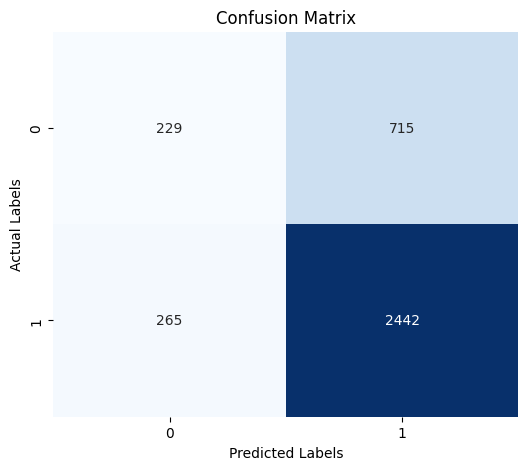

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,5)) 
cm=confusion_matrix(y_train, train_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False) 

plt.xlabel('Predicted Labels') 
plt.ylabel('Actual Labels') 
plt.title('Confusion Matrix') 

plt.show()

ValueError: X has 2 features, but LogisticRegression is expecting 4 features as input.

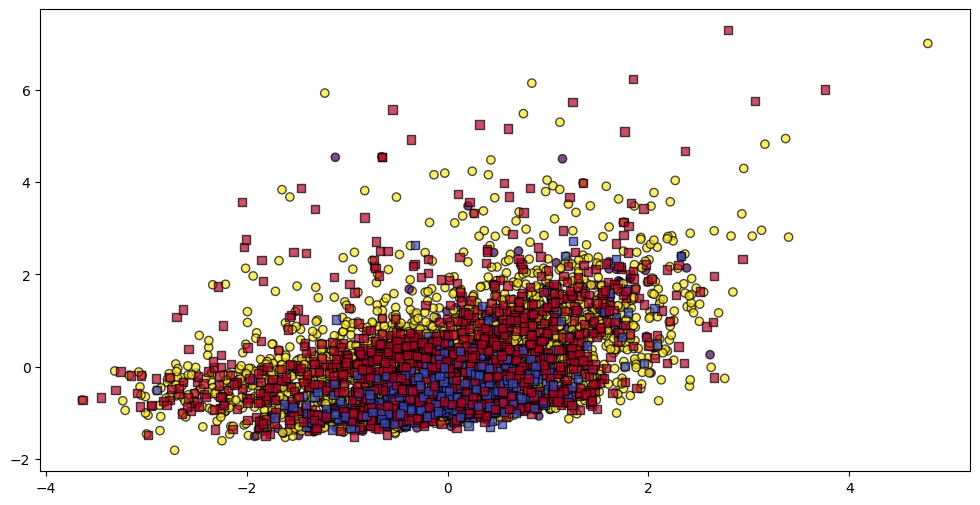

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Nuage de points des données d'entraînement
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='k', alpha=0.7, label='Training data')
# Nuage de points des données de test
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='s', edgecolor='k', alpha=0.7, label='Test data')

# Lignes de décision
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.colorbar()

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression - Decision Boundary and Data Points')
plt.legend()
plt.show()

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
# Initialiser le modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf.fit(X_train, y_train)

# Prédictions sur les données d'entraînement
train_predictions_rf = rf.predict(X_train)
train_probabilities_rf = rf.predict_proba(X_train)[:, 1]

# Résultats sur les données d'entraînement
df_train_results_rf = pd.DataFrame(y_train)
df_train_results_rf['predicted'] = train_predictions_rf
df_train_results_rf['probability'] = train_probabilities_rf

print("Random Forest - Training Results")
print(df_train_results_rf.head())

train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
print(f'Accuracy on training data (Random Forest): {train_accuracy_rf:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, train_predictions_rf))
print('Classification Report:')
print(classification_report(y_train, train_predictions_rf))

# Prédictions sur les données de test
test_predictions_rf = rf.predict(X_test)
test_probabilities_rf = rf.predict_proba(X_test)[:, 1]

# Résultats sur les données de test
df_test_results_rf = pd.DataFrame(y_test)
df_test_results_rf['predicted'] = test_predictions_rf
df_test_results_rf['probability'] = test_probabilities_rf

print("Random Forest - Test Results")
print(df_test_results_rf.head())

test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)
print(f'Accuracy on test data (Random Forest): {test_accuracy_rf:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, test_predictions_rf))
print('Classification Report:')
print(classification_report(y_test, test_predictions_rf))

Random Forest - Training Results
      Étiquette  predicted  probability
1051          0          0         0.25
3209          1          1         1.00
3599          1          1         1.00
4758          1          1         1.00
4500          1          1         0.99
Accuracy on training data (Random Forest): 1.00
Confusion Matrix:
[[ 921    0]
 [   0 2730]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       921
           1       1.00      1.00      1.00      2730

    accuracy                           1.00      3651
   macro avg       1.00      1.00      1.00      3651
weighted avg       1.00      1.00      1.00      3651

Random Forest - Test Results
      Étiquette  predicted  probability
1897          1          1         1.00
877           0          0         0.22
4503          1          1         0.68
4725          1          1         0.88
1595          1          1         0.99
Accuracy on tes

In [6]:
# Initialiser le modèle Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle
dt.fit(X_train, y_train)

# Prédictions sur les données d'entraînement
train_predictions_dt = dt.predict(X_train)
train_probabilities_dt = dt.predict_proba(X_train)[:, 1]

# Résultats sur les données d'entraînement
df_train_results_dt = pd.DataFrame(y_train)
df_train_results_dt['predicted'] = train_predictions_dt
df_train_results_dt['probability'] = train_probabilities_dt

print("Decision Tree - Training Results")
print(df_train_results_dt.head())

train_accuracy_dt = accuracy_score(y_train, train_predictions_dt)
print(f'Accuracy on training data (Decision Tree): {train_accuracy_dt:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, train_predictions_dt))
print('Classification Report:')
print(classification_report(y_train, train_predictions_dt))

# Prédictions sur les données de test
test_predictions_dt = dt.predict(X_test)
test_probabilities_dt = dt.predict_proba(X_test)[:, 1]

# Résultats sur les données de test
df_test_results_dt = pd.DataFrame(y_test)
df_test_results_dt['predicted'] = test_predictions_dt
df_test_results_dt['probability'] = test_probabilities_dt

print("Decision Tree - Test Results")
print(df_test_results_dt.head())

test_accuracy_dt = accuracy_score(y_test, test_predictions_dt)
print(f'Accuracy on test data (Decision Tree): {test_accuracy_dt:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, test_predictions_dt))
print('Classification Report:')
print(classification_report(y_test, test_predictions_dt))

Decision Tree - Training Results
      Étiquette  predicted  probability
1051          0          0          0.0
3209          1          1          1.0
3599          1          1          1.0
4758          1          1          1.0
4500          1          1          1.0
Accuracy on training data (Decision Tree): 1.00
Confusion Matrix:
[[ 921    0]
 [   0 2730]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       921
           1       1.00      1.00      1.00      2730

    accuracy                           1.00      3651
   macro avg       1.00      1.00      1.00      3651
weighted avg       1.00      1.00      1.00      3651

Decision Tree - Test Results
      Étiquette  predicted  probability
1897          1          1          1.0
877           0          1          1.0
4503          1          1          1.0
4725          1          1          1.0
1595          1          1          1.0
Accuracy on tes

In [3]:
import csv
import random

# Chemin vers votre CSV d'origine
csv_file_in = "/Users/chawkibhd/Desktop/LR_grabor/image_features.csv"

# Chemin vers le CSV en sortie (mélangé)
csv_file_out = "/Users/chawkibhd/Desktop/LR_grabor/image_features.csv"

with open(csv_file_in, 'r', newline='', encoding='utf-8') as f_in:
    reader = csv.reader(f_in)
    # Convertir le reader en liste
    rows = list(reader)

# Supposons que la première ligne est l'entête :
header = rows[0]
# Les données commencent à la deuxième ligne
data = rows[1:]

# Mélanger les données
random.shuffle(data)

# Écriture dans un nouveau fichier CSV
with open(csv_file_out, 'w', newline='', encoding='utf-8') as f_out:
    writer = csv.writer(f_out)
    # Réécrire l'entête
    writer.writerow(header)
    # Réécrire les lignes mélangées
    writer.writerows(data)

print("Le CSV a été mélangé et sauvegardé dans", csv_file_out)

Le CSV a été mélangé et sauvegardé dans /Users/chawkibhd/Desktop/LR_grabor/image_features.csv


In [3]:
import joblib
import numpy as np

In [20]:
logreg = joblib.load('../../models/logistic_regression_multi_features_model.pkl')

C:\Users\Whitebay\AppData\Local\Temp\ipykernel_20528\3714992555.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_names, y=coefs, palette='viridis')


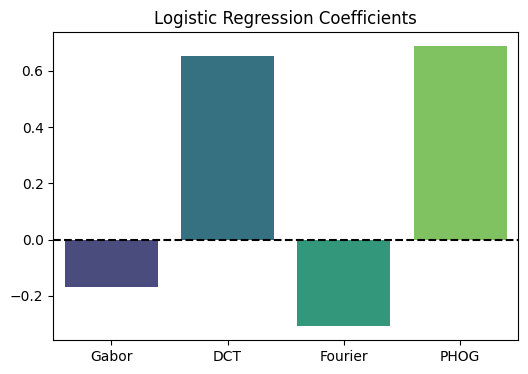

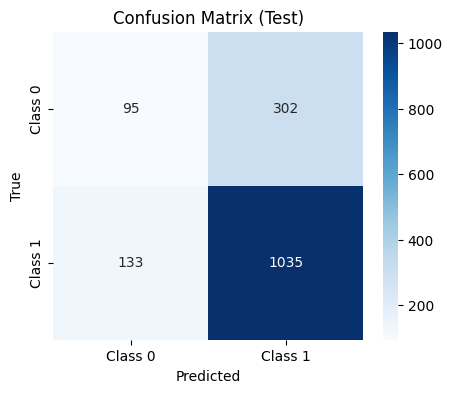

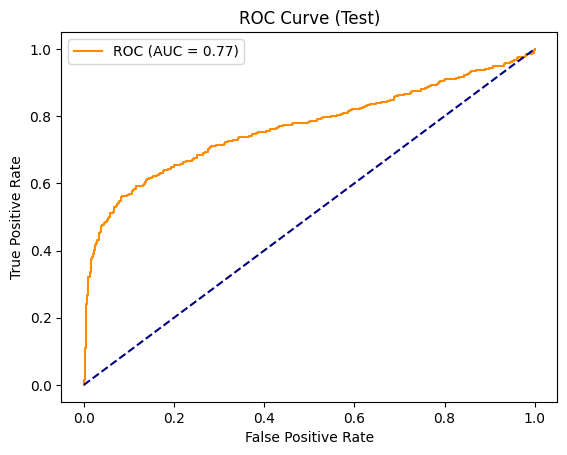

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# 1) Bar plot of coefficients
feature_names = ['Gabor', 'DCT', 'Fourier', 'PHOG']
coefs = logreg.coef_[0]
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_names, y=coefs, palette='viridis')
plt.axhline(0, color='black', linestyle='--')
plt.title("Logistic Regression Coefficients")
plt.show()

# 2) Confusion Matrix (Test)
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test)")
plt.show()

# 3) ROC Curve (Test)
fpr, tpr, _ = roc_curve(y_test, test_probabilities, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0,1],[0,1], linestyle='--', color='navy')
plt.title("ROC Curve (Test)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [21]:
print("coef_ shape:", logreg.coef_.shape)
print("feature_names:", feature_names)


coef_ shape: (1, 4)
feature_names: ['Gabor', 'DCT', 'Fourier', 'PHOG']


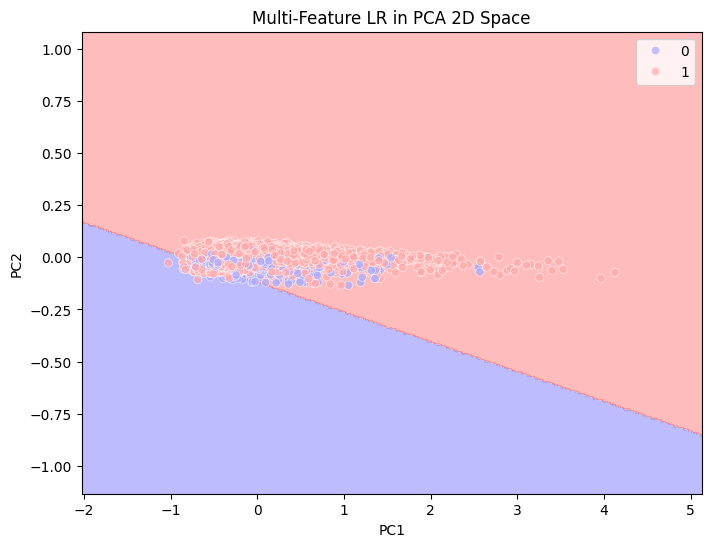

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# 1) Train logistic regression on 4 features
X = df[['Gabor', 'DCT', 'Fourier', 'PHOG']].values
y = df['Étiquette'].values
lr_all = LogisticRegression()
lr_all.fit(X, y)

# 2) Fit a PCA (2 components) on X
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)  # shape (n_samples, 2)

# 3) Create a mesh in the 2D PCA space
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid_2d = np.c_[xx.ravel(), yy.ravel()]  # shape (90000, 2)

# 4) Invert back to 4D space
grid_4d = pca.inverse_transform(grid_2d)  # shape (90000, 4)

# 5) Predict with your 4D logistic regression model
Z = lr_all.predict(grid_4d).reshape(xx.shape)

# 6) Plot decision regions & actual data in PCA space
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='bwr', alpha=0.7)
plt.title("Multi-Feature LR in PCA 2D Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
